# Insurance Premium

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

### Load Libraries

In [1]:
# Loading Important Libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.8 MB/s eta 0:00:00


In [67]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Import Ydata Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
##Importing the packages
from time import time
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import pearsonr                                    # Importing pearson test to check correlation
import statsmodels.api as sm                                        # Importing statsmodel api
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objects as go                                   # Importing plotly graphical interface
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor                      # Regression Model Decision Tree
from sklearn.ensemble import RandomForestRegressor                  # Regression Model Random Forest
from sklearn.svm import SVR                                         # Regression Model Support Vector Machine
from sklearn.linear_model import Ridge                              # Regression Model Lasso
from sklearn.linear_model import Lasso                              # Regression Model Lasso
from sklearn.neighbors import KNeighborsRegressor                   # Regression Model KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

## Insight about the dataset.


1.   Load the dataset
2.   Shape
3.   Info
4.   Details like duplicate and Null present into the dataset.



In [3]:
df = pd.read_csv('/content/sample_data/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90000,0,yes,southwest,16884.92000
1,18,male,33.80000,1,no,southeast,1725.55000
2,28,male,33.00000,3,no,southeast,4449.46000
3,33,male,22.70000,0,no,northwest,21984.47000
4,32,male,28.90000,0,no,northwest,3866.86000


As We can see that there are 7 Column present into the data set and **Target** **Variable is Expenses **

Rest Column are Independent Column

In [5]:
df.shape

(1338, 7)

There are 1338 Records are Present into the dataSet.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Below are the Details about the DataSets
1. There are 2 Integer Column { Age and Childern }
2. There are 2 Floating Column {BMI and Expeses}
3. There are 3 Objects are present {Sex, smoker and Region}
4. There is no Null values are present into the dataset.

## EDA

In [7]:
# Check the Null value Present into the data Frame
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [8]:
# Check how many Unique Gender are Present into data Frame
df['sex'].unique()

array(['female', 'male'], dtype=object)

<Axes: xlabel='sex', ylabel='count'>

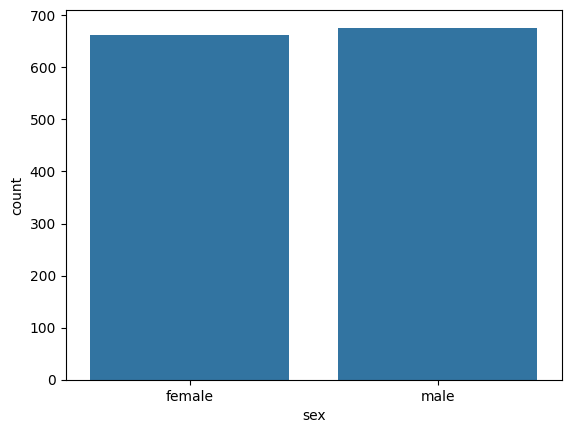

In [9]:
# Check count of Each Gender present into the data Frame
sns.countplot(x='sex',data=df)

As We observed that both are mostly same number so there is not issue in this column

Check the How many Duplicate value present into the dataset

In [10]:
# Check the Duplicate value present into the dataSet
df.duplicated().sum()

1

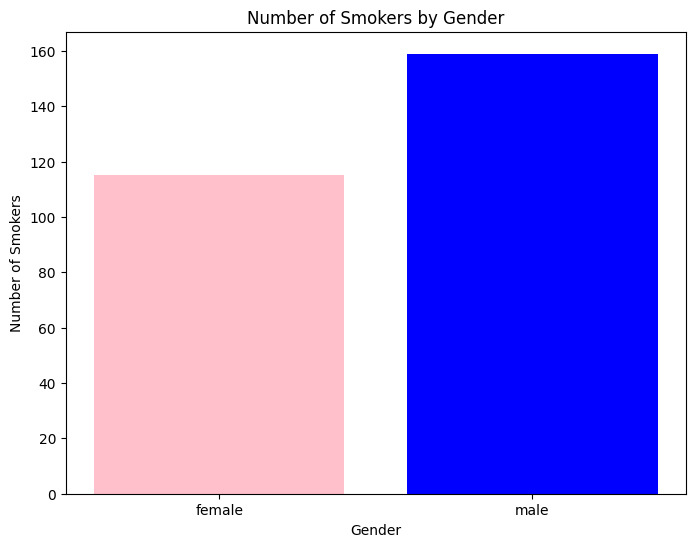

In [11]:
# Filter for smokers and group by sex
smoker_counts = df[df['smoker'] == 'yes'].groupby('sex').size().reset_index(name='Number_of_Smokers')
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(smoker_counts['sex'], smoker_counts['Number_of_Smokers'], color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Smokers')
plt.title('Number of Smokers by Gender')
plt.show()

As we can understand that data is not biased here both item have equal number of smokers

Now we need to show the how much expenses on the basis of Childeren count

Text(0.5, 1.0, 'Expenses vs. Number of Children')

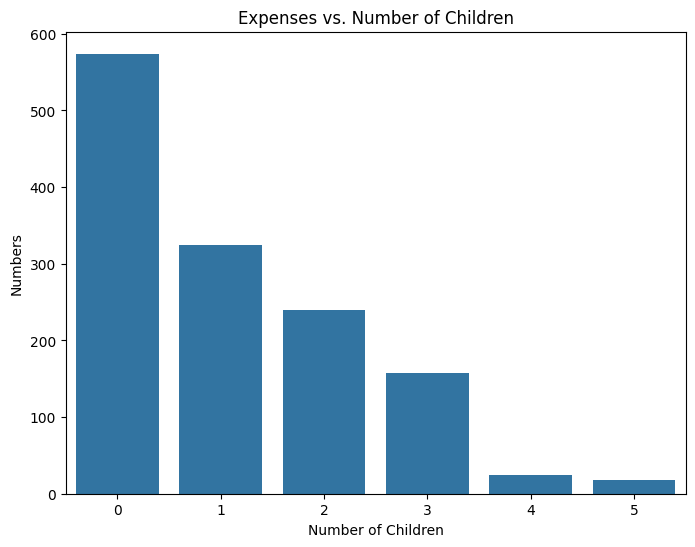

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=df)
plt.xlabel('Number of Children')
plt.ylabel('Numbers')
plt.title('Expenses vs. Number of Children')

As we can see there that there are many counts for the people heaving no childeren

### - Check the Count on the basis of Region

Text(0.5, 1.0, 'Expenses vs. Region')

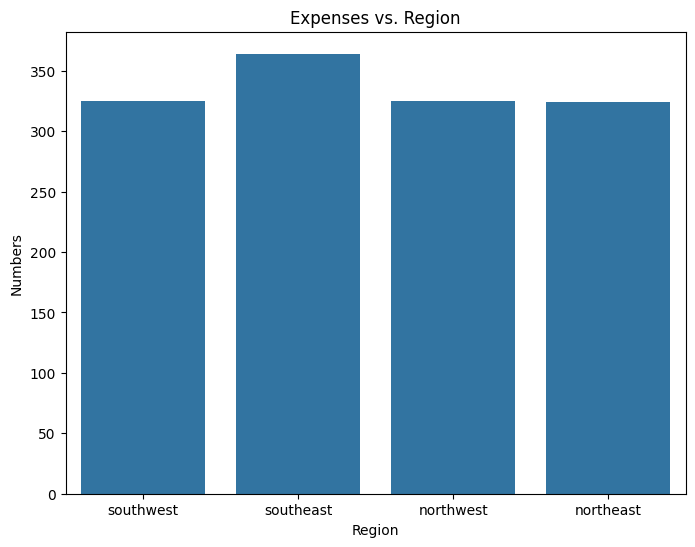

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=df)
plt.xlabel('Region')
plt.ylabel('Numbers')
plt.title('Expenses vs. Region')

As we observed that there is same data between each Regions

## Data Cleaning

1. Check the Null value present into the data Set.
2. Check the Duplicate value Present into the data set.
3. If there is Missing value then Handle it on the Basis of Mean/ median / Mode
4. Check the Outlier Present if there need to remove
5. Type Correction like Numeric not stored as String
6. Handling Categorical Variable


In [20]:
# Checking the Null value present into the data Sets
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [21]:
df.duplicated().sum()

1

There is one entry present into the data set is duplicate so we can removed it can not impact our data.


In [24]:
# Dropping the Duplicate entries into the dataSet.
df = df.drop_duplicates()
print("Shape of dataset before removed", df.shape)
print("Duplicate value",df.duplicated().sum())
print("Shape of dataset after Removed", df.shape)

Shape of dataset before removed (1337, 7)
Duplicate value 0
Shape of dataset after Removed (1337, 7)


<Axes: ylabel='age'>

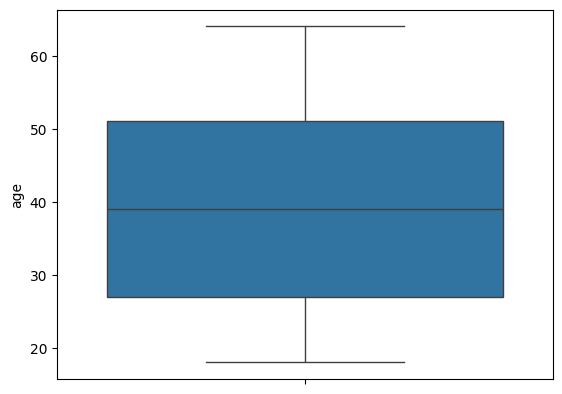

In [26]:
# We can check the outlier in Age , BMI and Childeren
# nWe can use the Box Plot and check the Outlier

sns.boxplot(data=df['age'])

As we cab observed that there is no outliser present into the data set

<Axes: ylabel='children'>

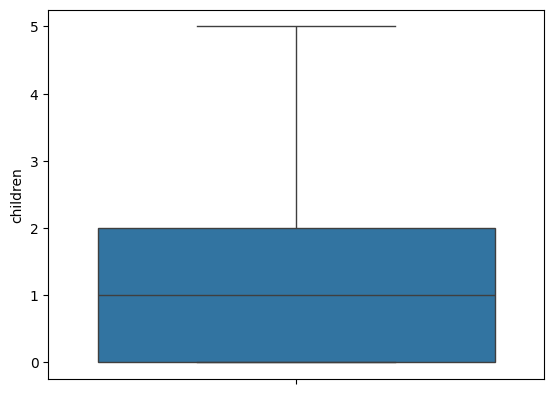

In [27]:
sns.boxplot(data=df['children'])

There is no outlier present into the dataset.

In [28]:
# Converting categorical data into the numerical
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90000,0,yes,southwest,16884.92000
1,18,male,33.80000,1,no,southeast,1725.55000
2,28,male,33.00000,3,no,southeast,4449.46000
3,33,male,22.70000,0,no,northwest,21984.47000
4,32,male,28.90000,0,no,northwest,3866.86000


# Data Preprocessing
1. Convert data in to Number if any object is present using LabelEncoder , GetDummies and other converting technique
2. Normalised the data into the standard format like standard Scaler, Min Max Scaler and other scaler technique
3. Convert data Into dependent and independent variable
4. Split the data into the Test and train

In [30]:
# Convert data into the Integer who have data types is object
#converting object columns to int by label encoder

for column in df.columns:
    if df[column].dtype=='object':
        encoder=LabelEncoder()
        df[column]=encoder.fit_transform(df[column])

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.90000,0,1,3,16884.92000
1,18,1,33.80000,1,0,2,1725.55000
2,28,1,33.00000,3,0,2,4449.46000
3,33,1,22.70000,0,0,1,21984.47000
4,32,1,28.90000,0,0,1,3866.86000


In [32]:
# Converting data into Dependent and Independent variable
X = df.drop(['expenses'], axis=1) # Independent variable
y = df['expenses'] # Dependent variable

The StandardScaler scales each feature according to the following formula:

𝑧
=
𝑥
−
𝜇
𝜎
z=
σ
x−μ
​

Where:

𝑥
x is the feature value.

𝜇
μ is the mean of the feature.

𝜎
σ is the standard deviation of the feature.

𝑧
z is the standardized value.
After scaling, the transformed data will have a mean of 0 and a standard deviation of 1

In [33]:
# Create the Object of scaler = StandardScaler() and convert into the same range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Converting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## Model Creation and Evalution

Here we are creating the fun that takes are model, model_name, X_train, y_train
that will return the 2_score, mae, rmse, execution_time

In [42]:
def regression(model, model_name, X_train, y_train):
    """
    Trains a regression model, evaluates its performance on the test set,
    and visualizes the predictions compared to the actual values.

    Parameters:
    -----------
    model : object
        The regression model instance (e.g., LinearRegression, RandomForestRegressor) to be trained.

    model_name : str
        The name of the model (for use in the plot title).

    X_train : array-like or DataFrame
        Training feature data used to fit the model.

    y_train : array-like or Series
        Target values corresponding to the training feature data.

    Returns:
    --------
    r2_score : float
        The R-squared score of the model, representing the proportion of the variance explained by the model.

    mae : float
        Mean Absolute Error (MAE) between the predicted and actual values.

    rmse : float
        Root Mean Squared Error (RMSE) between the predicted and actual values.

    execution_time : float
        The time taken to train the model and make predictions (in seconds).

    Visual Output:
    --------------
    A scatter plot comparing the actual vs predicted values is displayed,
    with a line indicating perfect prediction (actual = predicted).
    The plot includes R-squared, MAE, and RMSE values in the title.

    Example:
    --------
    >>> from sklearn.linear_model import LinearRegression
    >>> model = LinearRegression()
    >>> r2, mae, rmse, time = regression(model, "Linear Regression", X_train, y_train)
    """
    start_time = time()  # Record start time
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Plot actual vs predicted values
    plt.figure()
    plt.plot(y_test, y_test)  # Line showing perfect predictions
    plt.scatter(y_test, y_pred, s=10, c="red")  # Predicted values
    plt.title(f"{model_name} : R2_score = {round(r2_score, 2)}, MAE = {round(mae, 2)}, RMSE = {round(rmse, 2)}")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.show()

    end_time = time()  # Record end time
    execution_time = end_time - start_time  # Calculate execution time

    return r2_score, mae, rmse, execution_time

In [57]:
results = []

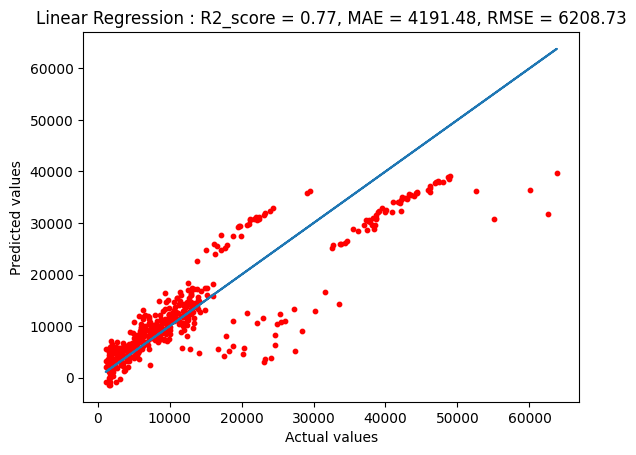

[{'Model': 'Linear Regression',
  'R2 Score': 0.7733793745803175,
  'MAE': 4191.483218773208,
  'RMSE': 6208.726225607014,
  'Execution Time (s)': 0.8243842124938965}]

In [58]:
model = LinearRegression()
model_name = "Linear Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})
results

### Desicison Tree



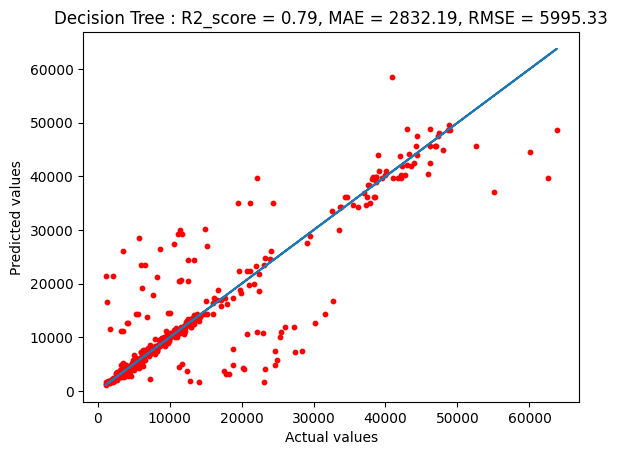

[{'Model': 'Linear Regression',
  'R2 Score': 0.7733793745803175,
  'MAE': 4191.483218773208,
  'RMSE': 6208.726225607014,
  'Execution Time (s)': 0.8243842124938965},
 {'Model': 'Decision Tree',
  'R2 Score': 0.7886895784221668,
  'MAE': 2832.19407239819,
  'RMSE': 5995.332187590813,
  'Execution Time (s)': 0.44508981704711914}]

In [60]:
model = DecisionTreeRegressor()
model_name = "Decision Tree"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})
results

### Random Forest Regression

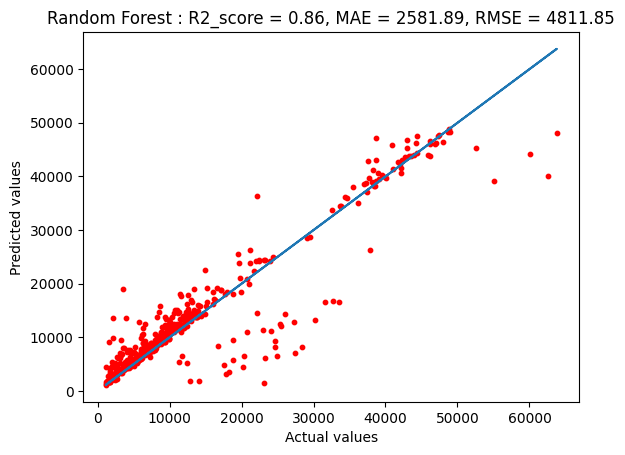

[{'Model': 'Linear Regression',
  'R2 Score': 0.7733793745803175,
  'MAE': 4191.483218773208,
  'RMSE': 6208.726225607014,
  'Execution Time (s)': 0.8243842124938965},
 {'Model': 'Decision Tree',
  'R2 Score': 0.7886895784221668,
  'MAE': 2832.19407239819,
  'RMSE': 5995.332187590813,
  'Execution Time (s)': 0.44508981704711914},
 {'Model': 'Random Forest',
  'R2 Score': 0.8638811498007367,
  'MAE': 2581.8897355203617,
  'RMSE': 4811.848321414294,
  'Execution Time (s)': 2.113804340362549}]

In [62]:
randomForest  = RandomForestRegressor()
model_name = "Random Forest"
r2_score, mae, rmse, execution_time = regression(randomForest, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})
results

### SVM (Support vector Machine)

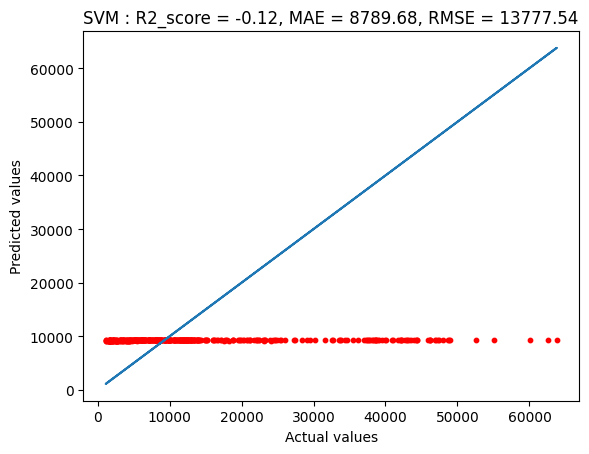

[{'Model': 'Linear Regression',
  'R2 Score': 0.7733793745803175,
  'MAE': 4191.483218773208,
  'RMSE': 6208.726225607014,
  'Execution Time (s)': 0.8243842124938965},
 {'Model': 'Decision Tree',
  'R2 Score': 0.7886895784221668,
  'MAE': 2832.19407239819,
  'RMSE': 5995.332187590813,
  'Execution Time (s)': 0.44508981704711914},
 {'Model': 'Random Forest',
  'R2 Score': 0.8638811498007367,
  'MAE': 2581.8897355203617,
  'RMSE': 4811.848321414294,
  'Execution Time (s)': 2.113804340362549},
 {'Model': 'SVM',
  'R2 Score': -0.11589415942123726,
  'MAE': 8789.66062626328,
  'RMSE': 13777.30571421287,
  'Execution Time (s)': 0.7031872272491455},
 {'Model': 'SVM',
  'R2 Score': -0.11593148925493413,
  'MAE': 8789.676482671763,
  'RMSE': 13777.536157317887,
  'Execution Time (s)': 0.5709471702575684}]

In [65]:
svm = SVR() #rbf = Radial basis function
model_name = "SVM"
r2_score, mae, rmse, execution_time = regression(svm, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})
results
#

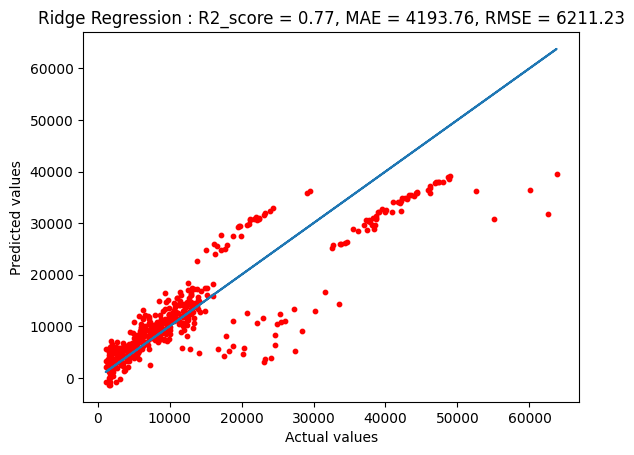

[{'Model': 'Linear Regression',
  'R2 Score': 0.7733793745803175,
  'MAE': 4191.483218773208,
  'RMSE': 6208.726225607014,
  'Execution Time (s)': 0.8243842124938965},
 {'Model': 'Decision Tree',
  'R2 Score': 0.7886895784221668,
  'MAE': 2832.19407239819,
  'RMSE': 5995.332187590813,
  'Execution Time (s)': 0.44508981704711914},
 {'Model': 'Random Forest',
  'R2 Score': 0.8638811498007367,
  'MAE': 2581.8897355203617,
  'RMSE': 4811.848321414294,
  'Execution Time (s)': 2.113804340362549},
 {'Model': 'SVM',
  'R2 Score': -0.11589415942123726,
  'MAE': 8789.66062626328,
  'RMSE': 13777.30571421287,
  'Execution Time (s)': 0.7031872272491455},
 {'Model': 'SVM',
  'R2 Score': -0.11593148925493413,
  'MAE': 8789.676482671763,
  'RMSE': 13777.536157317887,
  'Execution Time (s)': 0.5709471702575684},
 {'Model': 'Ridge Regression',
  'R2 Score': 0.7731968946430969,
  'MAE': 4193.763401779034,
  'RMSE': 6211.225424408614,
  'Execution Time (s)': 0.28327488899230957}]

In [70]:
model = Ridge(alpha=1.0)
model_name = "Ridge Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

#

### KNN

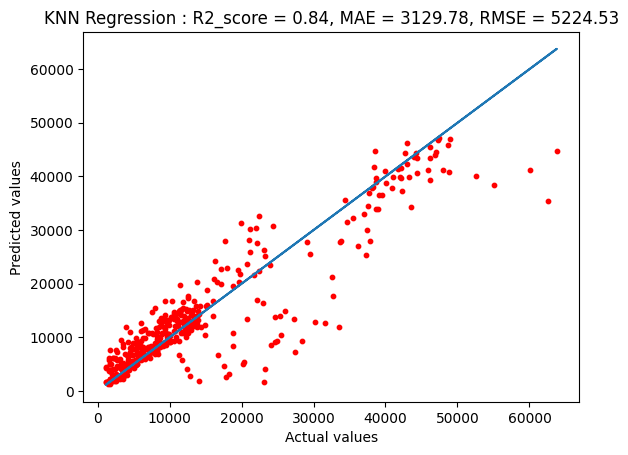

In [71]:
model = KNeighborsRegressor(n_neighbors=5)
model_name = "KNN Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})


### Gradient Boosting Regression

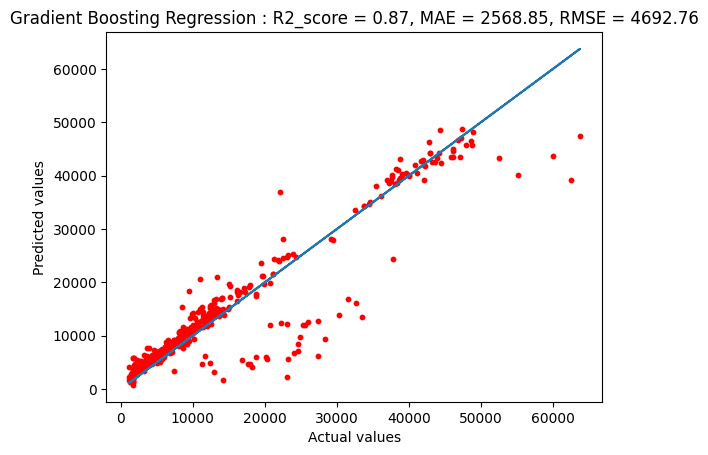

In [72]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model_name = "Gradient Boosting Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

### Ada Boost Regression¶

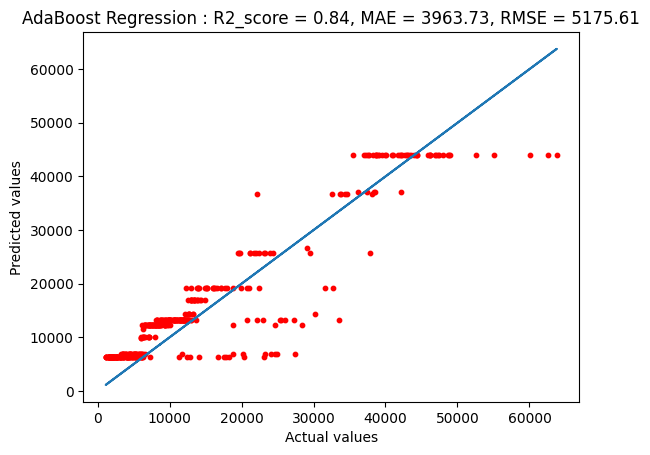

In [73]:
model = AdaBoostRegressor(n_estimators=100, random_state=0)
model_name = "AdaBoost Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

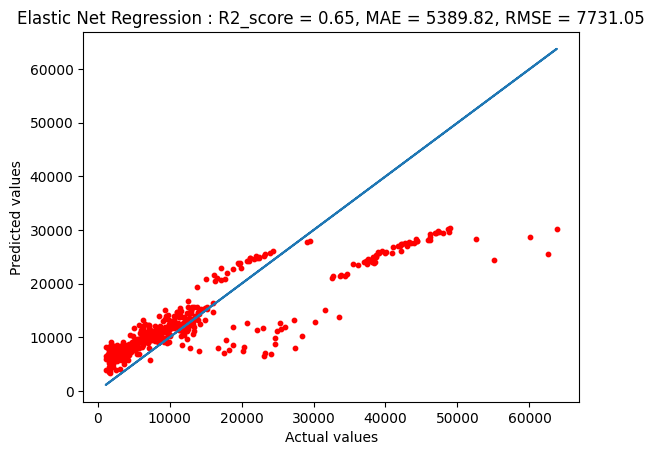

In [74]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0)
model_name = "Elastic Net Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

In [75]:
results

[{'Model': 'Linear Regression',
  'R2 Score': 0.7733793745803175,
  'MAE': 4191.483218773208,
  'RMSE': 6208.726225607014,
  'Execution Time (s)': 0.8243842124938965},
 {'Model': 'Decision Tree',
  'R2 Score': 0.7886895784221668,
  'MAE': 2832.19407239819,
  'RMSE': 5995.332187590813,
  'Execution Time (s)': 0.44508981704711914},
 {'Model': 'Random Forest',
  'R2 Score': 0.8638811498007367,
  'MAE': 2581.8897355203617,
  'RMSE': 4811.848321414294,
  'Execution Time (s)': 2.113804340362549},
 {'Model': 'SVM',
  'R2 Score': -0.11589415942123726,
  'MAE': 8789.66062626328,
  'RMSE': 13777.30571421287,
  'Execution Time (s)': 0.7031872272491455},
 {'Model': 'SVM',
  'R2 Score': -0.11593148925493413,
  'MAE': 8789.676482671763,
  'RMSE': 13777.536157317887,
  'Execution Time (s)': 0.5709471702575684},
 {'Model': 'Ridge Regression',
  'R2 Score': 0.7731968946430969,
  'MAE': 4193.763401779034,
  'RMSE': 6211.225424408614,
  'Execution Time (s)': 0.28327488899230957},
 {'Model': 'KNN Regressi

In [78]:
results_df = pd.DataFrame(results)

# Print the DataFrame
results_df.head(10)

,Model,R2 Score,MAE,RMSE,Execution Time (s)
0,Linear Regression,0.77338,4191.48322,6208.72623,0.82438
1,Decision Tree,0.78869,2832.19407,5995.33219,0.44509
2,Random Forest,0.86388,2581.88974,4811.84832,2.11380
3,SVM,-0.11589,8789.66063,13777.30571,0.70319
4,SVM,-0.11593,8789.67648,13777.53616,0.57095
5,Ridge Regression,0.77320,4193.76340,6211.22542,0.28327
6,KNN Regression,0.83953,3129.78479,5224.53292,0.51349
7,Gradient Boosting Regression,0.87054,2568.85101,4692.76461,0.44827
8,AdaBoost Regression,0.84252,3963.72649,5175.61286,0.47647
9,Elastic Net Regression,0.64862,5389.81659,7731.05183,0.43754


In [79]:
sorted_results_df = results_df.sort_values(by='R2 Score', ascending=False)

In [80]:
sorted_results_df.head(10)

,Model,R2 Score,MAE,RMSE,Execution Time (s)
7,Gradient Boosting Regression,0.87054,2568.85101,4692.76461,0.44827
2,Random Forest,0.86388,2581.88974,4811.84832,2.11380
8,AdaBoost Regression,0.84252,3963.72649,5175.61286,0.47647
6,KNN Regression,0.83953,3129.78479,5224.53292,0.51349
1,Decision Tree,0.78869,2832.19407,5995.33219,0.44509
0,Linear Regression,0.77338,4191.48322,6208.72623,0.82438
5,Ridge Regression,0.77320,4193.76340,6211.22542,0.28327
9,Elastic Net Regression,0.64862,5389.81659,7731.05183,0.43754
3,SVM,-0.11589,8789.66063,13777.30571,0.70319
4,SVM,-0.11593,8789.67648,13777.53616,0.57095
